# Ford GoBike dataset analysis
## by Mohamed Khaled Eldemerdash

## Dataset  Overview

Ford GoBike is a public bicycle sharing system. In 2013 the bike sharing service was introduced to the Bay Area in San Fransisco. Currently, the company is looking forward to provide more than 7000 bikes in the bay region.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

## Investigation Overview 

I will Investigate the ride trends as well as different user types of the Ford goBike sharing system. The highlight of this exploration would be the trip duration and different user trends.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('clean_dataset.csv')

In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,start_time_hour,member_age
count,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000,170732.000000
mean,632.331520,139.137578,37.771315,-122.351892,136.623199,37.771499,-122.351455,4489.496216,1985.481843,10.538859,13.468975,33.518157
std,505.977384,111.666219,0.100236,0.117531,111.285175,0.100134,0.117082,1656.020809,8.952835,8.432956,4.744547,8.952835
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1959.000000,1.016667,0.000000,18.000000
25%,322.000000,49.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3824.000000,1981.000000,5.366667,9.000000,27.000000
50%,508.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4963.000000,1987.000000,8.466667,14.000000,32.000000
75%,782.250000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5508.000000,1992.000000,13.037500,17.000000,38.000000
max,5986.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,99.766667,23.000000,60.000000


## First let us check the trip duration in minutes

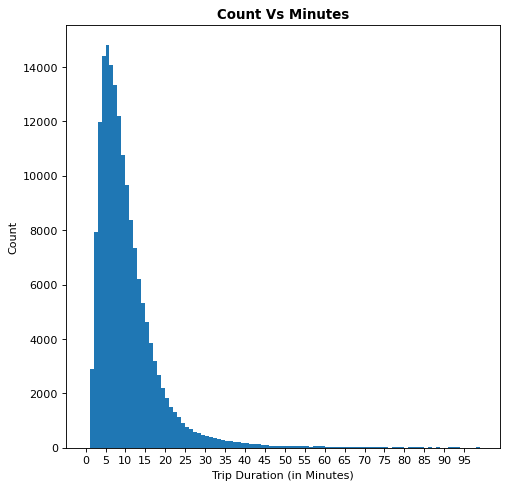

In [4]:
fig=plt.figure(figsize=(7,7), dpi= 80)


bins = np.arange(0, 100, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=df, x='duration_min', bins=bins);
plt.xticks(ticks);
plt.xlabel('Trip Duration (in Minutes)');
plt.ylabel('Count')
plt.title('Count Vs Minutes', fontweight='bold');


* Most trips are observed to take around 60 minutes at most

* The mean value for trip durations in minutes is about 8.5 minutes.

## Next we will check out members' age

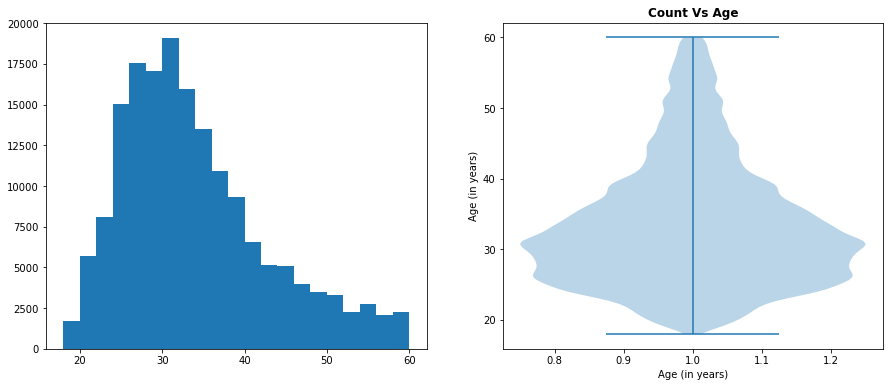

In [5]:
f = plt.figure(figsize=(15,6))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
binsize = 2
bins = np.arange(18, df['member_age'].max()+binsize, binsize)
ax.hist(data = df, x = 'member_age', bins = bins);
plt.xlabel('Age (in years)');
plt.ylabel('Count');
plt.title('Count Vs Age', fontweight='bold');

ax2.violinplot(df['member_age']);
plt.ylabel('Age (in years)');


* The distribution for the age is observed to be right skewed. 

* This makes sence as most bikers are of young age around 30 years old, while fewer bikers are above 40 years old

## Now we will dive in deeper into the analysis by checking for the Variation of Users by days and hours
* In the beginning we will investigate how the user count vary over days as well as over hours

In [6]:
default_color = sb.color_palette()[0]

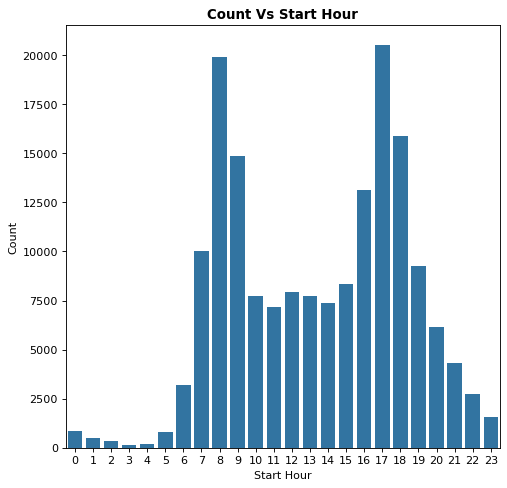

In [7]:
fig=plt.figure(figsize=(7, 7), dpi= 80)

sb.countplot(data = df, x = 'start_time_hour', color = default_color);
plt.xlabel('Start Hour');
plt.ylabel('Count');
plt.title('Count Vs Start Hour', fontweight='bold');

* Peak biking hours are around 08:00 and 17:00 which is the rush hour.

* Most bikers cycle in the time range between 07:00 till around 19:00

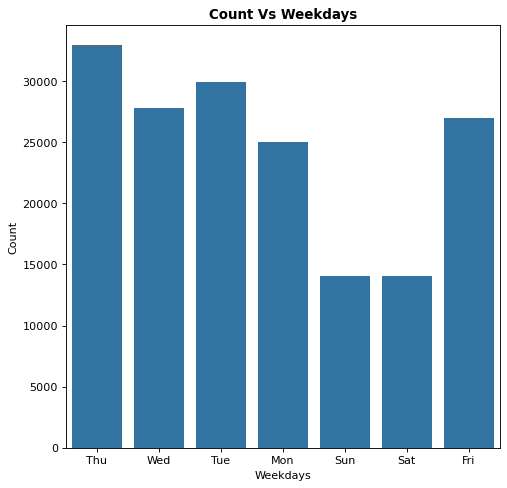

In [8]:
fig=plt.figure(figsize=(7, 7), dpi= 80)

sb.countplot(data = df, x = 'start_time_day', color = default_color);
plt.xlabel('Weekdays');
plt.ylabel('Count');
plt.title('Count Vs Weekdays', fontweight='bold');

* Most bikes are rented on Thursdays.

* Renting on weekdays is observed to be higher than on weekends.

## Now we will investigate members' gender distribution

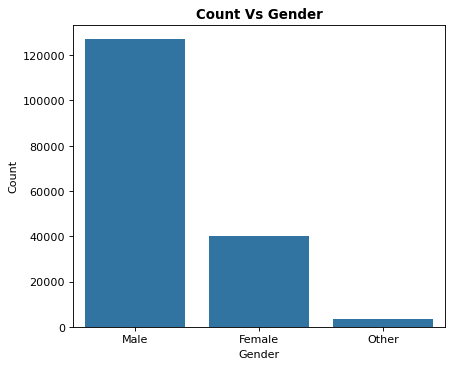

In [9]:
fig=plt.figure(figsize=(6, 5), dpi= 80)

sb.countplot(data = df, x = 'member_gender', color = default_color);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Count Vs Gender', fontweight='bold');

* Male bikers are more than threefolds female bikers.

## User types and their variation with trip duration 

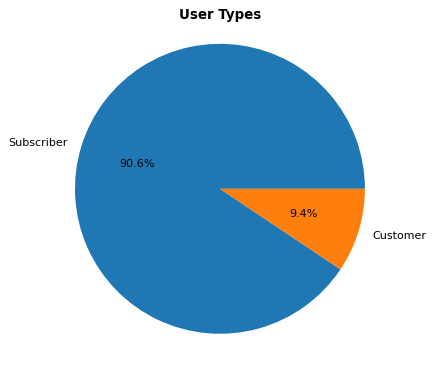

In [10]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.pie(df['user_type'].value_counts(),labels=df['user_type'].value_counts().index,autopct= '%1.1f%%')
plt.title('User Types', y=.95, fontweight='bold', color = 'black');

* About 90.6% of all bikers that use Ford GoBike are subscibers and enjoy more benefits since they are regular users.

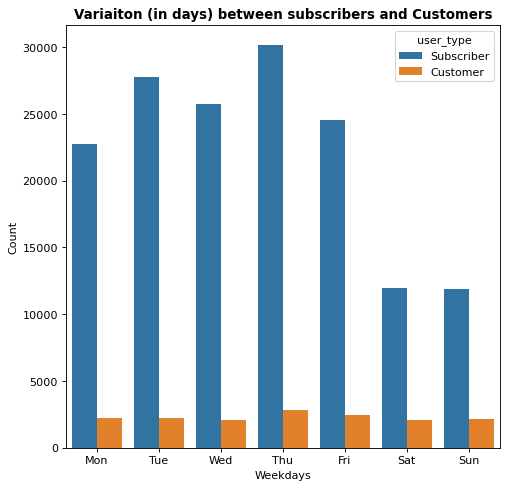

In [11]:
fig=plt.figure(figsize=(7,7), dpi= 80)

weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
sb.countplot(data=df, x='start_time_day', hue='user_type',order=weekdays);
plt.xlabel('Weekdays');
plt.ylabel('Count');
plt.title('Variaiton (in days) between subscribers and Customers', fontweight='bold');

* Most subscribers cycle on weekdays to work which is suggested by the drop in the count on weekends. 

* Customers' count is consistent through out the week, which indicate that they cycle as a habit or for fun on their free time.

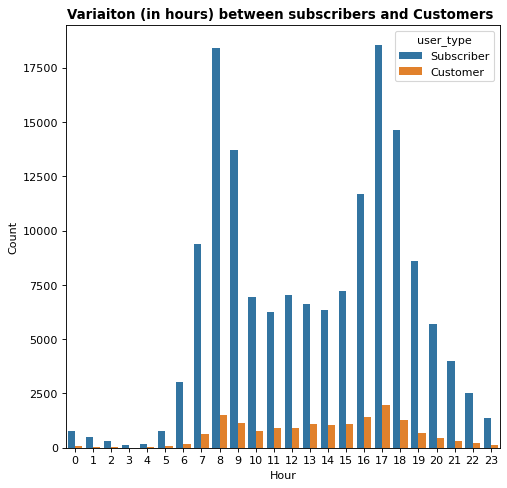

In [12]:
fig=plt.figure(figsize=(7,7), dpi= 80)

sb.countplot(data=df, x='start_time_hour', hue='user_type');
plt.xlabel('Hour');
plt.ylabel('Count');
plt.title('Variaiton (in hours) between subscribers and Customers ', fontweight='bold');

* Both subscribers and customers maintain a similar pattern.
* The peak time is usually between 07:00 and 19:00 with the rush hours around 08:00 and 17:00.
* Subscribers commute to work, therefore they are more active on weekdays than customers and drop on weekends.

## Let's investigate their distributions
### variation of trip duration with users

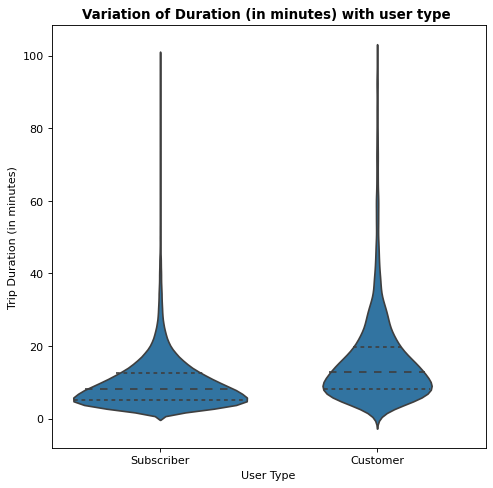

In [13]:
fig=plt.figure(figsize=(7,7), dpi= 80)

sb.violinplot(data=df, x='user_type', y='duration_min', color=default_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration (in minutes)');
plt.title('Variation of Duration (in minutes) with user type ',fontweight='bold');

* Customer's distribution indicate their randomness since they are more spread out.
* Subscribers are more concentrated which indicate their pattern in cycling (for instance, they cycle to and from work for a set duration every weekday).

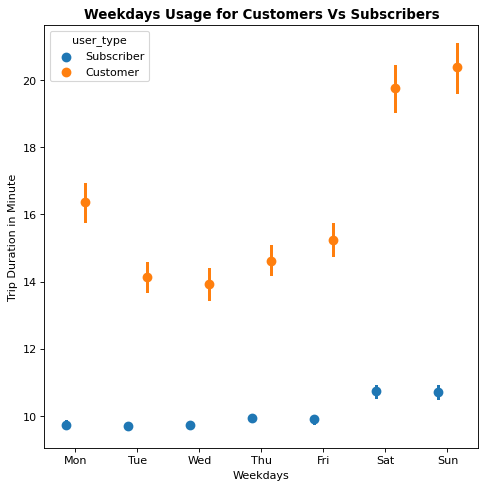

In [14]:
fig=plt.figure(figsize=(7,7), dpi= 80)

plt.title("Weekdays Usage for Customers Vs Subscribers", fontweight='bold')




sb.pointplot(data=df, x='start_time_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="",order=weekdays);
plt.xlabel('Weekdays');
plt.ylabel('Trip Duration in Minute');

* Customers ride for longer durations than subscribers throughout the whole week.
* Customers are inconsistent with their pattern as observed before, unlike subscribers who cycle regularly to commute to work on weekdays.

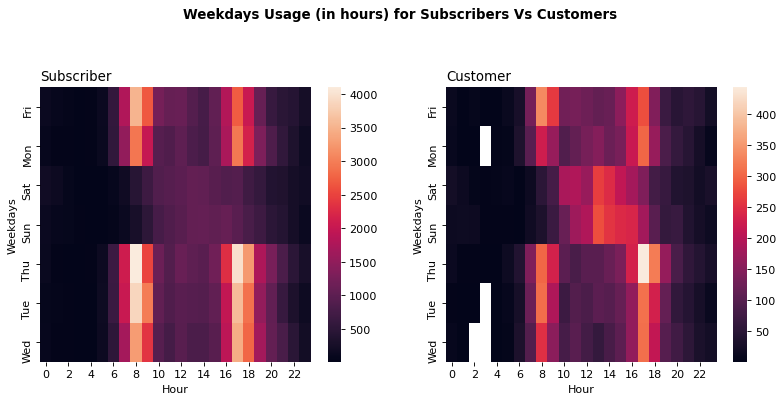

In [15]:
fig=plt.figure(figsize=(12,10), dpi= 80)

plt.suptitle("Weekdays Usage (in hours) for Subscribers Vs Customers",fontweight='bold')

plt.subplot(2, 2, 1)
subscribers = df[df['user_type']=='Subscriber']
subscriber_counts = subscribers.groupby(['start_time_day', 'start_time_hour']).size().reset_index(name='count')
subscriber_counts = subscriber_counts
subscriber_counts = subscriber_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(subscriber_counts);
plt.title('Subscriber', loc='left');
plt.xlabel('Hour');
plt.ylabel('Weekdays');


plt.subplot(2, 2, 2)
customers = df[df['user_type']=='Customer']
customer_counts = customers.groupby(['start_time_day', 'start_time_hour']).size().reset_index(name='count')
customer_counts = customer_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(customer_counts);
plt.title('Customer', loc='left');
plt.xlabel('Hour');
plt.ylabel('Weekdays');

* Subscribers cycle usually on regular working hours throughout weekdays. 
* Most customers have a similar but more random pattern.
* Some customers might also be using Ford goBikes to cycle to their work.

## Summary

After thoroughly investigating the variables we we can conclude that subscribers are using the Ford goBike more than casual customers. However, they do cycle for shorter fixed durations. We also found that there are patterns in subscribers' behavior on weekdays due to work where it peaks during rush hours at 07:00 and 19:00. Finally, we also deducted that casual customers vary and some of them also do commute to work.

In [ ]:
 !jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt